## Model Training

### Import required packages

In [39]:
# Basic Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
# Modelling
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings

#### Import the cleaned CSV Data as Pandas DataFrame

In [40]:
df = pd.read_csv('data/cleaned_cargo_data.csv')

### Top 5 and Bottom 5 rows

In [41]:

df.head()

,gender,race_ethnicity,level_of_education,language_proficiency,training_manuals,pre_exams_average,Certification_exam_Outcome
0,male,group A,high school,fluent,none,65,1
1,female,group E,some college,intermediate,provided,87,1
2,male,group A,some college,fluent,none,47,0
3,female,group E,some college,fluent,provided,75,1
4,male,group E,some college,fluent,none,71,1


In [42]:
df.tail()

,gender,race_ethnicity,level_of_education,language_proficiency,training_manuals,pre_exams_average,Certification_exam_Outcome
1112,female,group C,high school,fluent,provided,84,1
1113,female,group E,master's degree,intermediate,none,56,0
1114,male,group D,master's degree,fluent,none,79,1
1115,female,group C,master's degree,intermediate,provided,81,1
1116,female,group D,master's degree,fluent,provided,87,1


## <font color=blue>Split Dataset</font>

In [43]:
X = df.drop(columns=['Certification_exam_Outcome'],axis=1)

In [44]:
X.head()

,gender,race_ethnicity,level_of_education,language_proficiency,training_manuals,pre_exams_average
0,male,group A,high school,fluent,none,65
1,female,group E,some college,intermediate,provided,87
2,male,group A,some college,fluent,none,47
3,female,group E,some college,fluent,provided,75
4,male,group E,some college,fluent,none,71


In [45]:
X.shape

(1117, 6)

### Categorical Columns

In [46]:
# unique values in cat columns
print("Categories in 'gender' variable:     ",end=" " )
print(df['gender'].unique())

print("Categories in 'race_ethnicity' variable:  ",end=" ")
print(df['race_ethnicity'].unique())

print("Categories in'level of education' variable:",end=" " )
print(df['level_of_education'].unique())

print("Categories in 'language proficiency' variable:     ",end=" " )
print(df['language_proficiency'].unique())

print("Categories in 'training manuals' variable:     ",end=" " )
print(df['training_manuals'].unique())

Categories in 'gender' variable:      ['male' 'female' 'other']
Categories in 'race_ethnicity' variable:   ['group A' 'group E' 'group B' 'group D' 'group C']
Categories in'level of education' variable: ['high school' 'some college' 'some high school' "associate's degree"
 "bachelor's degree" "master's degree"]
Categories in 'language proficiency' variable:      ['fluent' 'intermediate' 'limitted']
Categories in 'training manuals' variable:      ['none' 'provided']


In [47]:
# replace the gender with 'Other' values with mode of the col
mode_gender = df['gender'].mode()[0]
print(mode_gender)
# Replace 'Other' values with the mode value
df['gender'] = df['gender'].replace('other', mode_gender)

female


In [48]:

print(df['gender'].unique())

['male' 'female']


In [49]:
y = df['Certification_exam_Outcome']

In [50]:
y.shape

(1117,)

In [51]:
y


0       1
1       1
2       0
3       1
4       1
       ..
1112    1
1113    0
1114    1
1115    1
1116    1
Name: Certification_exam_Outcome, Length: 1117, dtype: int64

In [52]:
# Create Column Transformer with 3 types of transformers
#  categorical features using OneHotEncoder,
# numeric features using StandardScaler.
num_features = X.select_dtypes(exclude="object").columns
cat_features = X.select_dtypes(include="object").columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, cat_features),
         ("StandardScaler", numeric_transformer, num_features),        
    ]
)

In [53]:

X_preprocessed = preprocessor.fit_transform(X)

In [54]:
X_preprocessed.shape

(1117, 20)

### Handling imbalanced data

In [67]:
y.value_counts()

Certification_exam_Outcome
1    766
0    351
Name: count, dtype: int64

In [68]:
from imblearn.over_sampling import SMOTE

In [71]:
X_resampled, y_resampled =SMOTE().fit_resample(X_preprocessed,y)

In [72]:
y_resampled.value_counts()

Certification_exam_Outcome
1    766
0    766
Name: count, dtype: int64

In [73]:
# separate dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_resampled,y_resampled,test_size=0.2,random_state=42)
X_train.shape, X_test.shape

((1225, 20), (307, 20))

In [74]:
X_train.shape

(1225, 20)

In [75]:
X_train

array([[ 0.        ,  1.        ,  0.        , ...,  0.        ,
         1.        ,  0.58745174],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         1.        , -0.64417544],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         1.        , -1.45832308],
       ...,
       [ 1.        ,  0.        ,  0.        , ...,  1.        ,
         0.        ,  0.86114667],
       [ 0.        ,  1.        ,  0.        , ...,  1.        ,
         0.        , -1.54134228],
       [ 1.        ,  0.        ,  0.        , ...,  0.03146099,
         0.96853901, -0.92002305]])

In [76]:
y

0       1
1       1
2       0
3       1
4       1
       ..
1112    1
1113    0
1114    1
1115    1
1116    1
Name: Certification_exam_Outcome, Length: 1117, dtype: int64

In [77]:
#### Create a Function to give all metrics after model Training
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

Linear Regression
Model performance for Test set
- R2 Score: 0.6173


Lasso
Model performance for Test set
- R2 Score: -0.0013


Ridge
Model performance for Test set
- R2 Score: 0.6186


K-Neighbors Regressor
Model performance for Test set
- R2 Score: 0.6964


Decision Tree
Model performance for Test set
- R2 Score: 0.6823


Random Forest Regressor
Model performance for Test set
- R2 Score: 0.7810


XGBRegressor
Model performance for Test set
- R2 Score: 0.7469




c:\Users\seben\Google Drive\Data Science-2023\icargo_ML_project\venv_icargo\lib\site-packages\xgboost\data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):


CatBoosting Regressor
Model performance for Test set
- R2 Score: 0.7931


AdaBoost Regressor
Model performance for Test set
- R2 Score: 0.7550




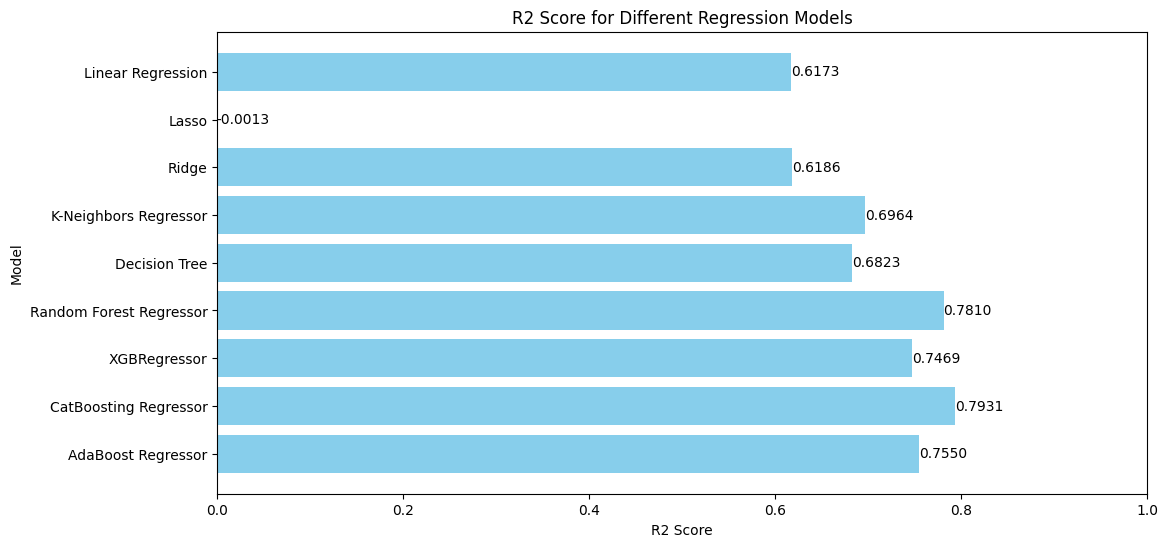

In [81]:
import matplotlib.pyplot as plt
import numpy as np

models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(), 
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}

model_list = []
r2_list = []

for model_name, model in models.items():
    model.fit(X_train, y_train)  # Train model

    # Make predictions
    y_test_pred = model.predict(X_test)

    # Evaluate Test dataset
    _, _, model_test_r2 = evaluate_model(y_test, y_test_pred)

    print(model_name)
    model_list.append(model_name)

    print('Model performance for Test set')
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)

    print('=' * 35)
    print('\n')

# Create a bar graph of R2 scores for each model with annotations
plt.figure(figsize=(12, 6))
bars = plt.barh(model_list, r2_list, color='skyblue')
plt.xlabel('R2 Score')
plt.ylabel('Model')
plt.title('R2 Score for Different Regression Models')
plt.xlim([0, 1])  # Set the x-axis limit between 0 and 1 for R2 scores

# Add annotations to the bars
for bar, r2_score in zip(bars, r2_list):
    plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, f'{r2_score:.4f}', ha='left', va='center')

plt.gca().invert_yaxis()  # Invert the y-axis to show the highest score at the top
plt.show()


## CatBoosting Regressor

In [82]:
from catboost import CatBoostRegressor
from sklearn.metrics import r2_score

# Create and fit the CatBoostRegressor model
catboost_model = CatBoostRegressor(verbose=False)
catboost_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_catboost = catboost_model.predict(X_test)

# Calculate the R2 score
r2_catboost = r2_score(y_test, y_pred_catboost)

print("R2 Score for CatBoost Regressor: {:.4f}".format(r2_catboost))


R2 Score for CatBoost Regressor: 0.7931


##  y_pred and y_test plts

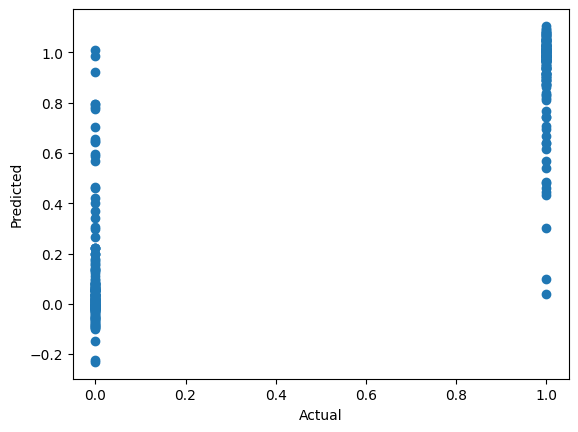

In [83]:
plt.scatter(y_test,y_pred_catboost);
plt.xlabel('Actual');
plt.ylabel('Predicted');

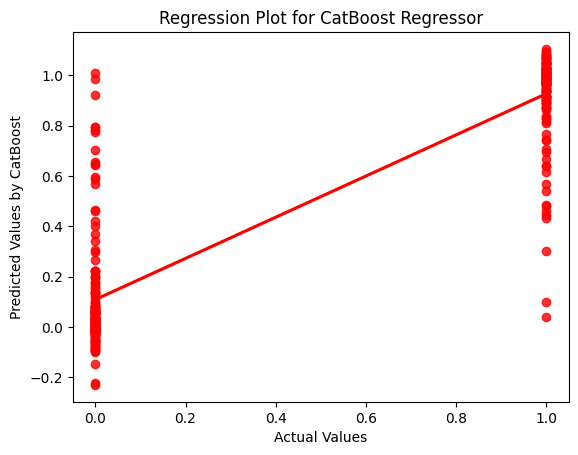

In [84]:
sns.regplot(x=y_test, y=y_pred_catboost, ci=None, color='red')

# Add labels and a title
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values by CatBoost')
plt.title('Regression Plot for CatBoost Regressor')

# Show the plot
plt.show()

### Actual and Pred values differences

In [86]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred_catboost,'Difference':y_test-y_pred_catboost})
pred_df

,Actual Value,Predicted Value,Difference
888,1,0.916803,0.083197
76,0,0.587697,-0.587697
316,0,0.020566,-0.020566
664,1,1.042868,-0.042868
571,0,0.111500,-0.111500
...,...,...,...
1179,0,0.004460,-0.004460
997,1,0.971772,0.028228
727,1,1.014349,-0.014349
233,1,0.838841,0.161159


In [88]:
print("The max difference is:")
print(pred_df['Difference'].max())
print("\n")
print("The min difference is:")
print(pred_df['Difference'].min())


The max difference is:
0.9611812539137821


The min difference is:
-1.0102200558229018


# ________________AMAZING JOB!!! ________________________